In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import sklearn
from sklearn.model_selection import cross_validate as cv
from sklearn.metrics.pairwise import pairwise_distances

ratings = pd.read_csv('./ratings.dat', sep='::', encoding='latin-1', usecols=['userId', 'movieId', 'rating'])

users = pd.read_csv('./users.dat', sep='::', encoding='latin-1', usecols=['userId', 'gender', 'age', 'occupation', 'zipcode'])

movies = pd.read_csv('./movies.dat', sep='::', encoding='latin-1', usecols=['movieId', 'title', 'genres'])

C:\Users\Jude Apana Yinime\AppData\Local\Temp\ipykernel_5968\1531288566.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings = pd.read_csv('./ratings.dat', sep='::', encoding='latin-1', usecols=['userId', 'movieId', 'rating'])
C:\Users\Jude Apana Yinime\AppData\Local\Temp\ipykernel_5968\1531288566.py:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  users = pd.read_csv('./users.dat', sep='::', encoding='latin-1', usecols=['userId', 'gender', 'age', 'occupation', 'zipcode'])
C:\Users\Jude Apana Yinime\AppData\Local\Temp\ipykernel_5968\1531288566.py:14: ParserWarning: Falling back to the 'python' 

In [4]:
print(users.head())

   userId gender  age  occupation zipcode
0       1      F    1          10   48067
1       2      M   56          16   70072
2       3      M   25          15   55117
3       4      M   45           7   02460
4       5      M   25          20   55455


In [3]:
print(ratings.head())

   userId  movieId  rating
0       1     1193       5
1       1      661       3
2       1      914       3
3       1     3408       4
4       1     2355       5


In [4]:
print(movies.head())

   movieId                               title                        genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy


C:\Users\Jude Apana Yinime\AppData\Local\Temp\ipykernel_5968\2134419950.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ratings['rating'].fillna(ratings['rating'].median()))


<Axes: xlabel='rating', ylabel='Density'>

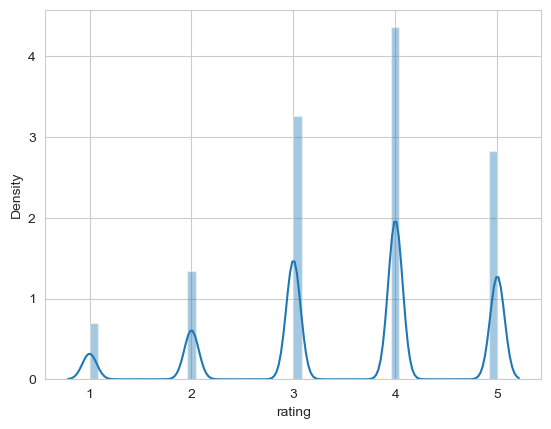

In [5]:
sns.distplot(ratings['rating'].fillna(ratings['rating'].median()))

In [6]:
dataset = pd.merge(pd.merge(movies, ratings),users)
dataset[['title','genres','rating']].sort_values('rating', ascending=False).head(20)

,title,genres,rating
0,Toy Story (1995),Animation|Children's|Comedy,5
489283,American Beauty (1999),Comedy|Drama,5
489259,Election (1999),Comedy,5
489257,"Matrix, The (1999)",Action|Sci-Fi|Thriller,5
489256,Dead Ringers (1988),Drama|Thriller,5
489237,Rushmore (1998),Comedy,5
489236,"Simple Plan, A (1998)",Crime|Thriller,5
489226,Hands on a Hard Body (1996),Documentary,5
489224,Pleasantville (1998),Comedy,5
489212,Say Anything... (1989),Comedy|Drama|Romance,5


In [7]:
ratings['userId'] = ratings['userId'].fillna(0)
ratings['movieId'] = ratings['movieId'].fillna(0)
ratings['rating'] = ratings['rating'].fillna(ratings['rating'].mean())

In [8]:
small_data = ratings.sample(frac=0.02)

In [9]:
print(small_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20004 entries, 445600 to 951077
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   userId   20004 non-null  int64
 1   movieId  20004 non-null  int64
 2   rating   20004 non-null  int64
dtypes: int64(3)
memory usage: 625.1 KB
None


In [10]:
from surprise import Reader, Dataset
reader = Reader()
data = Dataset.load_from_df(ratings, reader)

In [11]:
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=0.2)

In [12]:
from surprise import SVD, accuracy
model = SVD()
model.fit(trainset)
predictions = model.test(testset)

In [13]:
acc = accuracy.rmse(predictions)

RMSE: 0.8751


In [14]:
acc2 = accuracy.mae(predictions)

MAE:  0.6858


In [16]:
userid = str(50)
movieid = str(2000)

pred = model.predict(userid, movieid, r_ui=3, verbose=True)

user: 50         item: 2000       r_ui = 3.00   est = 3.58   {'was_impossible': False}


In [18]:
movieid = str(2058)
pred = model.predict(userid, movieid, r_ui=3, verbose=True)

user: 50         item: 2058       r_ui = 3.00   est = 3.58   {'was_impossible': False}


In [19]:
from surprise import KNNBasic

model = KNNBasic()
model.fit(trainset)
predictions = model.test(testset)
acc = accuracy.rmse(predictions)
acc2 = accuracy.mae(predictions)
print('Accuracy', acc)
print('Accuracy2 mae', acc2)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9248
MAE:  0.7280
Accuracy 0.9247593697014387
Accuracy2 mae 0.728033144316776


In [20]:
userid = str(1)
movieid = str(1193)
pred = model.predict(userid, movieid, r_ui=5, verbose=True)

user: 1          item: 1193       r_ui = 5.00   est = 3.58   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


In [28]:
print('look at the first column')

look at the first column
